# Mini-projet de statistiques

Informatique 2

2022 2023

# Importation des dépendances

In [1]:
import warnings

x = var('x')

# Fonctions permettant l'affichage de résultats sous forme de tableau

In [2]:
def ArrondiFlottantListe(Liste):
    ListeArrondie = []
    
    for i in range(len(Liste)):
        element = Liste[i]
        
        if type(element) != str:
            if element == int(element):
                element = "%.f" % element
            else:
                element = "%.4f" % element
        
        ListeArrondie.append(element)
        
    
    return ListeArrondie

def Tableau(Donnees, Entetes):
    # Donnees = [ [donnee] ]
    # Entetes [ entete ]
    # len([donnee]) = len(entetes)
    
    '''
    Permet d'afficher un tableau
    '''
    
    lignes = [ArrondiFlottantListe(data) for data in [Entetes] + Donnees]
    
    return table(rows = lignes, header_row = True, align='center')

# 1 Génération de lois continues

## 1. Ecriture de la fonction VAuniforme qui renvoie une valeur issue de la loi uniforme continue $\mathcal{U}(a, b)$

In [3]:
def VAuniforme(a, b):
    return a + random() * (b-a)

In [4]:
VAuniforme(1, 0)

0.6103217931070233

## 2. Vérification des résultats des estimateurs  $\bar{X}$ et $S'^2$

In [5]:
def genereEchantillons(loiProba, nbrEchantillons, *args):
    '''
    Génère nbrEchantillons echantillons à partir de la fonction loiProba avec les paramètres *args
    Exemple : genereEchantillons(VAuniforme, 100, 0, 1)
    '''
    
    listeEchantillon = [] # On stocke les échantillons
    for i in range(nbrEchantillons):
        echantillon = loiProba(*args)
        listeEchantillon.append(echantillon)
    
    return listeEchantillon

### Introduction de l'erreur quadratique moyenne $ E[(\hat{\theta} - \theta)^2] $

In [6]:
def ErreurQuadratique(listeEchantillon, parametreCible):
    '''
    Calcul la moyenne des erreurs quadratiques moyennes entre :
    - les estimations issues de l'estimateur (listeEchantillon)
    - le paramètre cible (parametreCible)
    '''
    
    listeDiffCarre = [(echantillon-parametreCible)**2 for echantillon in listeEchantillon]
    return mean(listeDiffCarre)

## Loi exponentielle $\epsilon(\lambda)$

Vérification pour $\lambda$ = 4

In [7]:
lamb = 4

Ereel = 1/lamb
Vreel = 1/(lamb**2)

# 1000 observations d'une variable aléatoire suivant la loi
listeEchantillon = genereEchantillons(expovariate, 1000, lamb)

Eobs = mean(listeEchantillon)
Vobs = variance(listeEchantillon)

# Affichage des résultats

Entetes = ['Paramètre', 'Valeur réelle', 'Estimation', 'Distance']

Donnees = []
Donnees.append(['Espérance', Ereel, Eobs, ErreurQuadratique([Eobs], Ereel)])
Donnees.append(['Variance ', Vreel, Vobs, ErreurQuadratique([Vobs], Vreel)])

Tableau(Donnees, Entetes)

Paramètre,Valeur réelle,Estimation,Distance
Espérance,0.2500,0.2479,0.0000
Variance,0.0625,0.0656,0.0000


Vérification le paramètre $ \lambda $ entier variant de 1 à 10

In [8]:
Donnees = []

for lamb in range(1, 11):
    Ereel = 1/lamb
    Vreel = 1/(lamb**2)
    listeEobs = []
    listeVobs = []
    
    # for i in range(1000):
    listeEchantillon = genereEchantillons(expovariate, 1000, lamb)
    Eobs = mean(listeEchantillon)
    Vobs = variance(listeEchantillon)

    listeEobs.append(Eobs)
    listeVobs.append(Vobs)
    
    Donnees.append([lamb, Ereel, Eobs, ErreurQuadratique(listeEobs, Ereel), Vreel, Vobs, ErreurQuadratique(listeVobs, Vreel)])
   
Entetes = ['lambda', 'Espérance réel', 'Espérance obs', 'Distance E(X)', 'Variance réelle', 'Variance obs', 'Distance V(X)']

Tableau(Donnees, Entetes)


lambda,Espérance réel,Espérance obs,Distance E(X),Variance réelle,Variance obs,Distance V(X)
1,1,0.9645,0.0013,1,0.8603,0.0195
2,0.5000,0.4941,0.0000,0.2500,0.2309,0.0004
3,0.3333,0.3421,0.0001,0.1111,0.1044,0.0000
4,0.2500,0.2402,0.0001,0.0625,0.0512,0.0001
5,0.2000,0.1930,0.0000,0.0400,0.0346,0.0000
6,0.1667,0.1698,0.0000,0.0278,0.0294,0.0000
7,0.1429,0.1392,0.0000,0.0204,0.0206,0.0000
8,0.1250,0.1221,0.0000,0.0156,0.0140,0.0000
9,0.1111,0.1173,0.0000,0.0123,0.0122,0.0000
10,0.1000,0.0990,0.0000,0.0100,0.0101,0.0000


## Loi gamma $\Gamma(k,\theta)$

Vérification pour la loi gamma $\Gamma(k,\theta)$ de paramètres $k=5, \theta=2$

In [9]:
k = 5
theta = 2

Ereel = k*theta
Vreel = k*theta**2

listeEchantillon = genereEchantillons(gammavariate, 1000, k, theta) # 1000 observations d'une variable aléatoire suivant la loi

Eobs = mean(listeEchantillon)
Vobs = variance(listeEchantillon)

# Affichage des résultats

Entetes = ['Paramètre', 'Valeur réelle', 'Estimation', 'Distance']

Donnees = []
Donnees.append(['Espérance', Ereel, Eobs, ErreurQuadratique([Eobs], Ereel)])
Donnees.append(['Variance ', Vreel, Vobs, ErreurQuadratique([Vobs], Vreel)])

Tableau(Donnees, Entetes)

Paramètre,Valeur réelle,Estimation,Distance
Espérance,10,10.0340,0.0012
Variance,20,19.6034,0.1573


Vérification pour la loi gamma $\Gamma(k,\theta)$ où k et $\theta$ entiers variant de 1 à 10

In [10]:
Donnees = []

for k in range(1, 11):
    for theta in range(1, 11):
        Ereel = k*theta
        Vreel = k*(theta**2)
        listeEobs = []
        listeVobs = []

        #for i in range(10):
        listeEchantillon = genereEchantillons(gammavariate, 3000, k, theta)
        Eobs = mean(listeEchantillon)
        Vobs = variance(listeEchantillon)

        listeEobs.append(Eobs)
        listeVobs.append(Vobs)

        Donnees.append([k, theta, Ereel, Eobs, ErreurQuadratique(listeEobs, Ereel), Vreel, Vobs, ErreurQuadratique(listeVobs, Vreel)])
   
Entetes = ['k', 'theta', 'Espérance réel', 'Espérance obs', 'Distance E(X)', 'Variance réelle', 'Variance obs', 'Distance V(X)']

Tableau(Donnees, Entetes)

k,theta,Espérance réel,Espérance obs,Distance E(X),Variance réelle,Variance obs,Distance V(X)
1,1,1,1.0062,0.0000,1,1.0306,0.0009
1,2,2,1.9686,0.0010,4,3.9035,0.0093
1,3,3,3.0251,0.0006,9,9.4516,0.2039
1,4,4,3.8820,0.0139,16,15.6672,0.1108
1,5,5,4.9783,0.0005,25,26.2754,1.6266
1,6,6,6.0743,0.0055,36,35.4724,0.2783
1,7,7,7.1483,0.0220,49,49.4399,0.1935
1,8,8,8.0758,0.0057,64,67.0342,9.2063
1,9,9,8.8759,0.0154,81,81.4147,0.1720
1,10,10,9.9775,0.0005,100,99.0817,0.8432


Vérification pour la loi normale $\mathcal{N}(\mu,\,\sigma^{2})$ de paramètre $\mu=5, \sigma=2$

In [11]:
mu = 5
sigma = 2

Ereel = mu
Vreel = sigma**2

listeEchantillon = genereEchantillons(normalvariate, 1000, mu, sigma)

Eobs = mean(listeEchantillon)
Vobs = variance(listeEchantillon)

# Affichage des résultats

Entetes = ['Paramètre', 'Valeur réelle', 'Estimation', 'Distance']

Donnees = []
Donnees.append(['Espérance', Ereel, Eobs, ErreurQuadratique([Eobs], Ereel)])
Donnees.append(['Variance ', Vreel, Vobs, ErreurQuadratique([Vobs], Vreel)])

Tableau(Donnees, Entetes)

Paramètre,Valeur réelle,Estimation,Distance
Espérance,5,4.9975,0.0000
Variance,4,3.9924,0.0001


Vérification pour la loi normale $\mathcal{N}(\mu,\,\sigma^{2})$ où $\mu$ et $\sigma$ entiers variant de -5 à 5 et 1 à 10 respectivement

In [12]:
Donnees = []

for mu in range(-5, 6):
    for sigma in range(1, 11):
        Ereel = mu
        Vreel = sigma**2
        listeEobs = []
        listeVobs = []

        #for i in range(10):
        listeEchantillon = genereEchantillons(normalvariate, 1000, mu, sigma)
        Eobs = mean(listeEchantillon)
        Vobs = variance(listeEchantillon)

        listeEobs.append(Eobs)
        listeVobs.append(Vobs)

        Donnees.append([mu, sigma, Ereel, Eobs, ErreurQuadratique(listeEobs, Ereel), Vreel, Vobs, ErreurQuadratique(listeVobs, Vreel)])
   
Entetes = ['mu', 'sigma', 'Espérance réel', 'Espérance obs', 'Distance E(X)', 'Variance réelle', 'Variance obs', 'Distance V(X)']

Tableau(Donnees, Entetes)

mu,sigma,Espérance réel,Espérance obs,Distance E(X),Variance réelle,Variance obs,Distance V(X)
-5,1,-5,-4.9741,0.0007,1,0.9818,0.0003
-5,2,-5,-4.9866,0.0002,4,3.9279,0.0052
-5,3,-5,-5.0364,0.0013,9,8.8128,0.0350
-5,4,-5,-4.9740,0.0007,16,14.3359,2.7694
-5,5,-5,-4.7155,0.0810,25,25.1622,0.0263
-5,6,-5,-5.0004,0.0000,36,36.6487,0.4208
-5,7,-5,-5.2550,0.0650,49,47.4073,2.5366
-5,8,-5,-5.1489,0.0222,64,65.6973,2.8807
-5,9,-5,-5.2080,0.0432,81,79.3219,2.8159
-5,10,-5,-5.7062,0.4988,100,100.7712,0.5947


## 3. Affichage d'histogramme pour 500 échantillons répartiés sur 20 classes pour 3 lois différentes

### Loi exponentielle $\epsilon(\lambda)$ de paramètre $\lambda= 5$

In [13]:
lamb = 5

listeEchExpo = genereEchantillons(expovariate, 500, lamb)

In [14]:
def densite_expo(x, lamb):
    '''
    Retourne la valeur de la fonction de densité de loi exponentielle de paramètre lambda fixé pour un antécédent donné (x)
    '''
    
    return lamb * exp(-lamb*x)

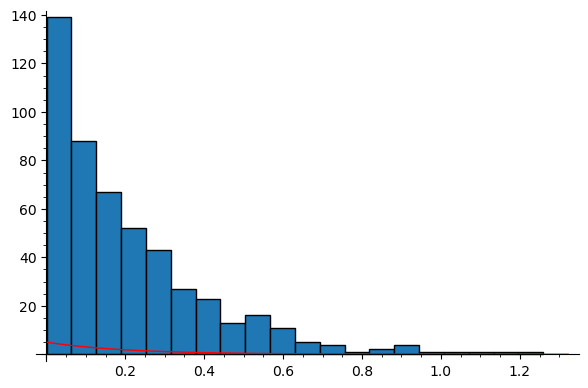

In [15]:
min_fact =  min(listeEchExpo)*0.95 if min(listeEchExpo) > 0 else  min(listeEchExpo)*1.05
max_fact = max(listeEchExpo)*1.05 if max(listeEchExpo) > 0 else max(listeEchExpo)*0.95

histogram(listeEchExpo,bins=20)+plot(densite_expo(x,lamb), (x, min_fact, max_fact), color='red', linestyle='-')

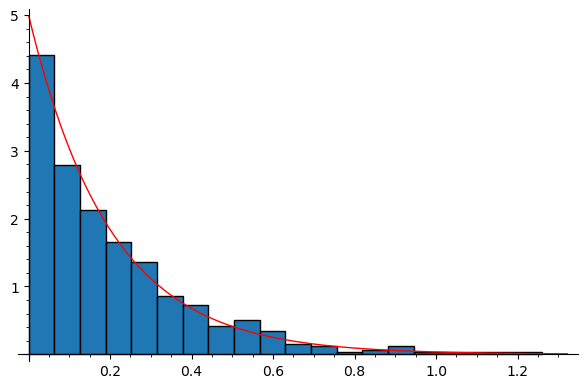

In [16]:
min_fact =  min(listeEchExpo)*0.95 if min(listeEchExpo) > 0 else  min(listeEchExpo)*1.05
max_fact = max(listeEchExpo)*1.05 if max(listeEchExpo) > 0 else max(listeEchExpo)*0.95

histogram(listeEchExpo,bins=20,density=True)+plot(densite_expo(x,lamb), (x, min_fact, max_fact), color='red', linestyle='-')

### Loi  Gamma $\Gamma(k,\theta)$ de paramètres $ k = 5 $ et $ \theta = 2 $

In [17]:
k = 5
theta = 2

listeEchGamma = genereEchantillons(gammavariate, 500, k, theta)

In [18]:
def densite_gamma(x, k, theta):
    '''
    Retourne la valeur de la fonction de densité de loi Gamma
    de paramètres k et theta fixés
    pour un antécédent donné (x)
    '''
    
    numerateur = (x**(k-1) * exp(-x/theta))
    denominateur = gamma(k) * theta**(k)
    
    return numerateur/denominateur

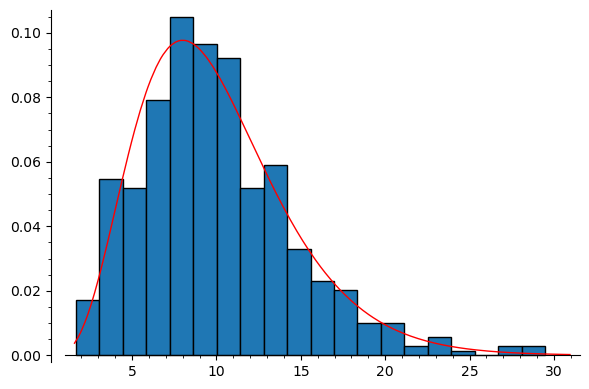

In [19]:
min_fact =  min(listeEchGamma)*0.95 if min(listeEchGamma) > 0 else  min(listeEchGamma)*1.05
max_fact = max(listeEchGamma)*1.05 if max(listeEchGamma) > 0 else max(listeEchGamma)*0.95

histogram(listeEchGamma, bins=20, density=True)+plot(densite_gamma(x, k, theta), (x, min_fact, max_fact), color='red', linestyle='-')

### Loi normale $\mathcal{N}(\mu,\,\sigma^{2})$ de paramètres $ \mu = 5 $ et $ \sigma = 4 $

In [20]:
mu = 5
sigma = 4

listeEchNorm = genereEchantillons(normalvariate, 500, mu, sigma)

In [21]:
def densite_normale(x, mu, sigma):
    '''
    Retourne la valeur de la fonction de densité de loi normale
    de paramètres mu et sigma fixés
    pour un antécédent donné (x)
    '''
    
    variance = sigma**2
    facteur = 1/(sigma*sqrt(2*pi))
    argument = -((x-mu)**2)/(2*variance)
    
    return facteur * exp(argument)

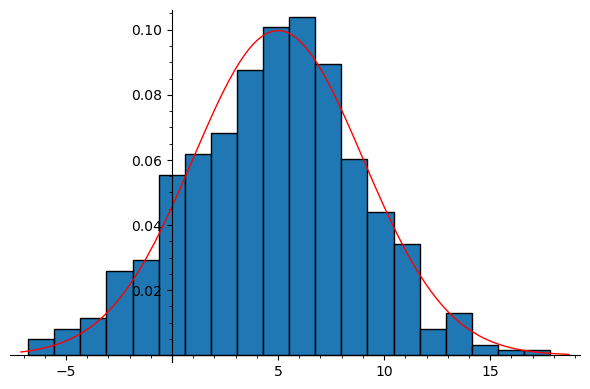

In [22]:
min_fact =  min(listeEchNorm)*0.95 if min(listeEchNorm) > 0 else  min(listeEchNorm)*1.05
max_fact = max(listeEchNorm)*1.05 if max(listeEchNorm) > 0 else max(listeEchNorm)*0.95

histogram(listeEchNorm,bins=20,density=True)+plot(densite_normale(x, mu, sigma), (x, min_fact, max_fact), color='red', linestyle='-')

### L'option "density"

Lorsqu'elle est placée à "False", l'histogramme est tel qu'il y est affiché le nombre de valeurs pour chaque classe.

Lorsqu'elle est placée à "True", il y a une normalisation des valeurs en ordonnée de façon à obtenir une intégrale (plutôt une somme) égale à 1 sur la plage de valeur prise en abscisse.

# 2 Programmation du test du ${\chi}^2$

## 2.1 Ajustement à la loi de Poisson

## 1. Calcul de la distribution de Poisson à partir des modalités des observations d'une loi discrète

In [23]:
def probabilitePoisson(k, lamb):
    '''
    Retourne la probabilité qu'une variable aléatoire suivant
    une loi de Poisson de paramètre lamb soit égale à k
    '''
    
    facteur = (lamb**k)/factorial(k)
    expo = math.exp(-lamb)
    
    return facteur*expo

In [24]:
def DistTheoriquePoisson(LoiDiscObs, lamb):
    # LoiDiscObs = [[effectif observée], [modalité]]
    
    distributionPoisson = [] #[ probabilite théorique p_i ] tel que p_i = P(X = listeModalite[i])
    
    listeModalite = LoiDiscObs[1]
    
    for modalite in listeModalite:
        distributionPoisson.append(probabilitePoisson(modalite, lamb)) # p_i = P(X = modalité i)
    
    return distributionPoisson

### 2. Implémentation de la distance $D^{2}_{n} $ du test $\chi^2$ $ $

On souhaite calculer la distance $\chi^2$ entre une loi observée et une loi théorique.

$D_n^2(\omega)=\sum_{i=1}^k \frac{(N_i(\omega)-np_i)^2}{np_i}$

Cette distance $D_n^2$ tend vers une loi du $\chi_{k-1}^2 = \Gamma(\frac{k-1}{2},\frac{1}{2})$ lorsque n tend vers $+\infty$.

In [25]:
def DistributionaEffectifTheorique(distributionTheorique, tailleEchantillon):
    '''
    Retourne l'effectif théorique
    à partir d'une distribution théorique obtenue avec de tailleEchantillon échantillons
    '''
    # distributionTheorique = [probabilité théorique]
    
    effTheorique = [tailleEchantillon * probabiliteTheorique for probabiliteTheorique in distributionTheorique]
    #effTheorique[i] = n * p_i
    
    return effTheorique # [effectif théorique]

def DistanceChiDeux(EffObs, EffTheorique):
    '''
    Retourne la valeur observée de la variable aléatoire D^2_n
    
    '''
    # EffObs = [effectif observée]
    # EffTheorique = [effectif théorique]
    
    distance = 0
    
    nbrModalite = len(EffObs)
    listeEffectifObs = EffObs[0]
    
    for k in range(nbrModalite):
        distance = distance + ((EffObs[k] - EffTheorique[k])**2)/EffTheorique[k] # Théorème 5.5.1
    
    return distance

### 2.2 Convergence de la loi binomiale vers la loi de Poisson

### 1. Mise en place de la loi de Bernoulli $b(p)$ de paramètre $ p \in ]0;1[$

In [26]:
def Bernoulli(p):
    '''
    Retourne une observation d'une variable aléatoire de loi de Bernoulli de paramètre p
    '''
    
    valeur = 0;
    a = random()
    
    if a <= p:
        valeur = 1
    else:
        valeur = 0
    
    return valeur

In [27]:
p = 0.25

l = [Bernoulli(p) for i in range(1000)]

Ereel = p
Vreel = p*(1-p)

Eobs = mean(l)
Vobs = variance(l)

# Affichage des résultats
# Affichage des résultats

Entetes = ['Paramètre', 'Valeur réelle', 'Estimation', 'Distance']

Donnees = []
Donnees.append(['Espérance', Ereel, Eobs, ErreurQuadratique([Eobs], Ereel)])
Donnees.append(['Variance ', Vreel, Vobs, ErreurQuadratique([Vobs], Vreel)])

Tableau(Donnees, Entetes)

Paramètre,Valeur réelle,Estimation,Distance
Espérance,0.2500,0.2560,0.0000
Variance,0.1875,0.1907,0.0000


### 2. Mise en place de la loi binomiale $ B(n, p)$ de paramètre $ n \in \mathbb{N} $ et $p \in ]0;1[$

Une observation d'une telle loi est équivalente à une observation de $n$ variables aléatoires indépendantes et identiquement distribués de loi de Bernoulli $b(p)$

In [28]:
def Binomiale(n, p):
    '''
    Retourne une observation d'une variable aléatoire de loi Binomiale de paramètre n et p
    '''
    
    tirageBernoulli = genereEchantillons(Bernoulli, n, p)
    
    valeur = sum(tirageBernoulli)
    
    return valeur

In [29]:
n = 8
p = 0.25

l = []
for i in range(10000):
    l.append(Binomiale(n, p))

Ereel = n*p
Vobs = n*p*(1-p)

Eobs = mean(l)
Vobs = variance(l)

# Affichage des résultats

Entetes = ['Paramètre', 'Valeur réelle', 'Estimation', 'Distance']

Donnees = []
Donnees.append(['Espérance', Ereel, Eobs, ErreurQuadratique([Eobs], Ereel)])
Donnees.append(['Variance ', Vreel, Vobs, ErreurQuadratique([Vobs], Vreel)])

Tableau(Donnees, Entetes)

Paramètre,Valeur réelle,Estimation,Distance
Espérance,2,2.0194,0.0004
Variance,0.1875,1.4720,1.6499


### 3. Implémentation de la fonction LoiDiscreteObs

In [30]:
def LoiDiscreteObs(L, a, b):
    '''
    Retourne la liste des modalités et des effectifs
    à partir d'une liste d'observation d'une variable aléatoire de loi discrète    
    '''
    L_ord = [x for x in L] # copie carbone sinon on ne fait que copier la référence à la liste
    L_ord.sort() # trie en place de la liste copiée, la liste originale est intouchée
    
    eff = []
    elt = []
    LoiObs = [eff, elt] # [[ effectif ], [ modalité ]]
    
    index = 0
    
    while(index < len(L_ord)):
        val = L_ord[index]
        
        if val < a:
            index = index + 1
        if val >= a:
            if val <= b:
                elt.append(val)
                occurence = L_ord.count(val)
                eff.append(occurence)
                index = index + occurence
            else: # val > b
                index = len(L_ord) # equivalent à break
    
    return LoiObs

In [31]:
L = [randint(0, 10) for i in range(6)]

print(f'Liste générée : {L}\nLe plus petit élément est {min(L)}\nLe plus grand élément est {max(L)}\n')

print(LoiDiscreteObs(L, min(L), max(L)))

Liste générée : [1, 0, 6, 0, 10, 1]
Le plus petit élément est 0
Le plus grand élément est 10

[[2, 2, 1, 1], [0, 1, 6, 10]]


### 4. Vérification du théorème de convergence de la loi binomiale vers la loi de Poisson

Si $X_n \hookrightarrow B(n,p_{n})$ et $ (n p_{n})\xrightarrow[n \rightarrow +\infty]{} \lambda$, alors $ X_n \xrightarrow[]{\mathbb{L}} X \hookrightarrow P(\lambda)$

Critère empirique : $n \geq 50$ et $\lambda \leq 0,1$

In [182]:
n = 100
p = VAuniforme(0, 0.1)

tailleEchantillon = 1000

print(f'n = {n}')
print(f'p = {p}')
print(f'taille d\'échantillon = {tailleEchantillon}')

n = 100
p = 0.0208711565319389
taille d'échantillon = 1000


In [193]:
echantillon_binomiale = genereEchantillons(Binomiale, tailleEchantillon, n, p)

moyObs = mean(echantillon_binomiale)
varObs = variance(echantillon_binomiale)

moyTheo = n*p
varTheo = n*p*(1-p)

# Affichage des résultats

Entetes = ['Paramètre', 'Valeur réelle', 'Estimation', 'Distance']

Donnees = []
Donnees.append(['Espérance', moyTheo, moyObs, ErreurQuadratique([moyObs], moyTheo)])
Donnees.append(['Variance ', varTheo, varObs, ErreurQuadratique([varObs], varTheo)])

Tableau(Donnees, Entetes)

Paramètre,Valeur réelle,Estimation,Distance
Espérance,2.0871,2.0350,0.0027
Variance,2.0436,1.9477,0.0092


## Test d'ajustement du Chi-Deux

L'objectif est de tester l'hypothèse

$H_{0}$ La loi observée suit une loi de Poisson de paramètre $\lambda = 2.035$

contre

$H_{1}$ La loi observée ne suit pas une loi de Poisson de paramètre $\lambda = 2.035$

### Obtention des effectifs observées et théoriques

1. On place les observations dans des modalités pour former les effectifs

2. On estime le paramètre $\lambda_{obs}$ par la moyenne empirique

3. On détermine la distribution de Poisson théorique avec $\lambda_{obs}$

In [202]:
loiObs = LoiDiscreteObs(echantillon_binomiale, 0, max(echantillon_binomiale))

lModalite = loiObs[1]
nbrModalite = len(lModalite)

param_estim = 0

lamb = moyObs
param_estim += 1

distributionTheorique = DistTheoriquePoisson(loiObs, lamb)

effectifTheorique = DistributionaEffectifTheorique(distributionTheorique, tailleEchantillon)

### Traitement des effectifs observées et théoriques

In [203]:
Entetes = ['Modalités'] + loiObs[1]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,0,1,2,3,4,5,6,7
Effectifs observées,129,258,286,174,96,45,10,2
Effectifs théoriques,130.6805,265.9348,270.5886,183.5493,93.3807,38.0059,12.8904,3.7474


Il faut vérifier que les effectifs théoriques soient supérieurs à 5 comme préconisé dans le cours

In [204]:
modalitePauvre = []
for i in range(nbrModalite):
    effectif = effectifTheorique[i]
    if effectif < 5:
        modalitePauvre.append(lModalite[i])

if len(modalitePauvre) > 0:
    print("Attention, les modalités suivantes ont moins de 5 observations :")
    print(', '.join(map(str, modalitePauvre)))

Attention, les modalités suivantes ont moins de 5 observations :
7


On regroupe les effectifs de modalités 6 et 7

In [206]:
indexCoupe = -1

# Traitement des effectifs théoriques

effectifTheorique[indexCoupe-1] += sum(effectifTheorique[indexCoupe:])
effectifTheorique = effectifTheorique[:indexCoupe]

# Traitement des effectifs observés

loiObs[0][indexCoupe-1] += sum(loiObs[0][indexCoupe:])
loiObs[0] = loiObs[0][:indexCoupe]

# Traitement de la liste des modalités

loiObs[1] = loiObs[1][:indexCoupe]

In [207]:
Entetes = ['Modalités'] + loiObs[1]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,0,1,2,3,4,5,6
Effectifs observées,129,258,286,174,96,45,12
Effectifs théoriques,130.6805,265.9348,270.5886,183.5493,93.3807,38.0059,16.6378


In [208]:
lModalite = loiObs[1]
nbrModalite = len(lModalite)

distChi2 = DistanceChiDeux(loiObs[0], effectifTheorique)

print(f'''Il y a {nbrModalite} modalités
Il a été estimé {param_estim} paramètre{"s" if param_estim > 1 else ""}
Le degré de liberté est {nbrModalite-1-param_estim}\n''')

print(f'La valeur de la distance suite au test du chi 2 est : {distChi2}')

Il y a 7 modalités
Il a été estimé 1 paramètre
Le degré de liberté est 5

La valeur de la distance suite au test du chi 2 est : 4.286248870693667


Sur les tables de $\chi_{5}^{2}$, on peut voir que la distance est d'environ de 9,236 pour un risque de première espèce $\alpha=0.1$

## 2.3 Ajustement à la loi exponentielle

### Etude de la structure de donnée LoiObs

[0.29856533156163023, 1.77404214224517, 0.14187578356946068, 0.13338267257893385, 0.05887121987217502, 0.2797845690653633, 2.5925789999331914, 0.1488617287735091, 0.528795400086756, 0.6137384882110414]
[0.2986, 1.7740, 0.1419, 0.1334, 0.0589 ... 1.7342, 1.2805, 4.6733, 1.2020, 1.0519]
([68, 22, 8, 2], [(0.032142889792734636, 1.258059678971049), (1.258059678971049, 2.483976468149363), (2.483976468149363, 3.7098932573276775), (3.7098932573276775, 4.935810046505992)])


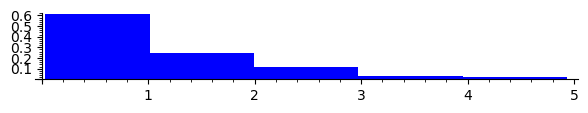

In [38]:
lamb = 1
taille_echan = 100

echan_exp = genereEchantillons(expovariate, taille_echan, lamb)
print(echan_exp[0:100//10])

echan_exp = finance.TimeSeries(echan_exp)

print(echan_exp)

LoiObs = echan_exp.histogram(lamb*4)

print(LoiObs)

echan_exp.plot_histogram(bins=lamb*5, normalize=True, aspect_ratio=1)

### Détermination de la moyenne empirique sur des classes

In [210]:
def moyenneSurClasses(loiObs):
    '''
    Retourne la moyenne des effectifs pondérés par la moyenne des 2 bornes de chaque classe
    '''    
    
    # LoiObs = [[effectif observée], [classe]]
    
    effObs = loiObs[0]
    classes = loiObs[1]
    
    moyObs = 0
    for i in range(len(classes)):
        classe = classes[i]
        classeMoyenne = (classe[0]+classe[1])/2
        effectif = effObs[i]

        moyObs = moyObs + (classeMoyenne * effectif)/tailleEchantillon
        
    return moyObs

### 1. Calcul de la distribution d'une loi exponentielle à partir des observations d'une loi discrète

$ \mathbb{P}(X \in [a;b[) = \int_{a}^{b} \lambda e^{-\lambda x} \,dx = e^{-\lambda a} - e^{-\lambda b} $ (1)

Cas particulier où $ b = +\infty$

$ \mathbb{P}(X \in [a;+\infty[) = \int_{a}^{+\infty} \lambda e^{-\lambda x} \,dx = e^{-\lambda a}$ (2)

In [40]:
def DistTheoriqueExp(LoiObs, lamb):
    # LoiObs = [[effectif observée], [classe]]
    
    distriExp = [] #[probabilité théorique]
    
    classes = LoiObs[1]
    
    for i in range(len(classes)-1):
        classe = classes[i]
        a = classe[0]
        b = classe[1]
        
        proba = exp(-lamb*a) - exp(-lamb*b) # Correspond à (1)
        distriExp.append(proba)
    
    derniereClasse = classes[-1]
    derniereProba = exp(-lamb*derniereClasse[0]) # Correspond à (2)
    distriExp.append(derniereProba)
    
    return distriExp

## 2. Modélisation d'un système de file d'attente par une loi exponentielle

Nous avons les observations suivantes :

In [226]:
effObs = [39, 26, 17 ,10, 6, 2]
classes = [(i, i+10) for i in range(0, 60, 10)]

loiObs = [effObs, classes]

Entetes = ['Classes'] + [f'[ {str(classe)[1:-1]} [' for classe in loiObs[1]]
Donnees = [['Effectifs observées'] + loiObs[0]]

Tableau(Donnees, Entetes)

Classes,"[ 0, 10 [","[ 10, 20 [","[ 20, 30 [","[ 30, 40 [","[ 40, 50 [","[ 50, 60 ["
Effectifs observées,39,26,17,10,6,2


Il faut estimer le paramètre $\lambda$ :

- $\lambda_{obs} = \frac{1}{\bar{x}}$

In [227]:
moyObs = moyenneSurClasses(loiObs)

paramEstime = 0

lamb = 1/moyObs
paramEstime += 1
    
print(f'La moyenne de l\'échantillon est {float(moyObs)} donc on choisit comme paramètre lambda {float(1/moyObs)}')

La moyenne de l'échantillon est 17.4 donc on choisit comme paramètre lambda 0.05747126436781609


## Test d'ajustement du Chi-Deux

L'objectif est de tester l'hypothèse

$H_{0}$ La loi observée suit une loi exponentielle de paramètre $\lambda = 0.5747$

contre

$H_{1}$ La loi observée ne suit pas une loi exponentielle de paramètre $\lambda = 0.5747$

### On détermine la distribution exponentielle théorique avec $\lambda_{obs}$

In [237]:
tailleEchantillon = sum(effObs)

distributionTheorique = DistTheoriqueExp(loiObs, lamb)

effectifTheorique = DistributionaEffectifTheorique(distributionTheorique, tailleEchantillon)

In [238]:
Entetes = ['Modalités'] + [f'[ {str(classe)[1:-1]} [' for classe in loiObs[1]]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,"[ 0, 10 [","[ 10, 20 [","[ 20, 30 [","[ 30, 40 [","[ 40, 50 [","[ 50, 60 ["
Effectifs observées,39,26,17,10,6,2
Effectifs théoriques,43.7133,24.6048,13.8492,7.7953,4.3877,5.6497


Il faut vérifier que les effectifs théoriques soient supérieurs à 5 comme préconisé dans le cours

In [236]:
nbrClasse = len(classes)

classePauvre = []
for i in range(nbrClasse):
    effectif = effectifTheorique[i]
    if effectif < 5:
        classePauvre.append(classes[i])

if len(classePauvre) > 0:
    print(f'Attention il y a {len(classePauvre)} classe{"s" if len(classePauvre) > 1 else ""} avec moins de 5 observations :')
    print(', '.join(map(str, classePauvre)))

Attention il y a 1 classe avec moins de 5 observations :
(40, 50)


On regroupe les effectifs des 2 dernières classes

In [245]:
indexCoupe = -1

# Traitement des effectifs théoriques

effectifTheorique[indexCoupe-1] += sum(effectifTheorique[indexCoupe:])
effectifTheorique = effectifTheorique[:indexCoupe]

# Traitement des effectifs observés

loiObs[0][indexCoupe-1] += sum(loiObs[0][indexCoupe:])
loiObs[0] = loiObs[0][:indexCoupe]

# Traitement de la liste des modalités

loiObs[1] = loiObs[1][:indexCoupe]

In [246]:
Entetes = ['Modalités'] + [f'[ {str(classe)[1:-1]} [' for classe in loiObs[1]]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,"[ 0, 10 [","[ 10, 20 [","[ 20, 30 [","[ 30, 40 [","[ 40, 50 ["
Effectifs observées,39,26,17,10,8
Effectifs théoriques,43.7133,24.6048,13.8492,7.7953,10.0374


In [247]:
distChi2 = DistanceChiDeux(loiObs[0], effectifTheorique)

print(f'''Il y a {nbrClasse} classes
Il a été estimé {param_estim} paramètre{"s" if paramEstime > 1 else ""}
Le degré de liberté est {nbrModalite-1-paramEstime}\n''')

print(f'La valeur de la distance suite au test du chi 2 est : {float(distChi2)}')

Il y a 6 classes
Il a été estimé 1 paramètre
Le degré de liberté est 5

La valeur de la distance suite au test du chi 2 est : 2.3412836030131943


Sur les tables de $\chi_{5}^{2}$, on peut voir que la distance est d'environ de 9,236 pour un risque de première espèce $\alpha=0.1$

### 2.4 Ajustement à la loi normale

### 1. Calcul de la distribution d'une loi normale à partir des observations d'une loi discrète

In [44]:
def DistTheoriqueNorm(LoiObs, moy, sig):
    # LoiObs = [[effectif observée], [classe]]
    
    distriNorm = [] #[probabilité théorique]
    
    classes = LoiObs[1]
    
    for i in range(len(classes)-1):
        classe = classes[i]
        a = classe[0]
        b = classe[1]
        
        proba = numerical_integral(densite_normale(x, moy, sig), a=a, b=b)[0]
        distriNorm.append(proba)
        
    derniereClasse = classes[-1]
    a = derniereClasse[0]
    derniereProba = numerical_integral(densite_normale(x, moy, sig), a=a, b=+infinity)[0]
    
    distriNorm.append(derniereProba)
    
    return distriNorm

### 2. Vérification du test d'ajustement pour une loi normale
On procède à 1000 observations d'une variable aléatoire suivant une loi normale $\mathcal{N}(1,2)$

In [293]:
moyTheo = 1
varTheo = 2

tailleEchantillon = 1000

normObs = genereEchantillons(normalvariate, tailleEchantillon, moyTheo, sqrt(varTheo))

## Test d'ajustement du Chi-Deux

### Obtention des effectifs observées et théoriques

1. On place les observations dans des classes pour former les effectifs

2. On estime le paramètre $\mu_{obs}$ par la moyenne empirique $\bar{X}$ (mean) et $\sigma_{obs}$ par la variance empirique non biaisée S' (variance)

3. On détermine la distribution normale théorique avec $\mu_{obs}$ et $\sigma_{obs}$

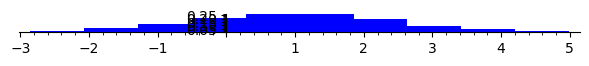

In [294]:
normObs = finance.TimeSeries(normObs)

loiObs = normObs.histogram(10)
effObs = loiObs[0]
classes = loiObs[1]
nbrClasse = len(classes)

normObs.plot_histogram(bins=nbrClasse, normalize=True, aspect_ratio=1)

In [295]:
paramEstime = 0

moyObs = mean(normObs)
mu = moyObs
paramEstime += 1

print(f'La moyenne de l\'échantillon est {float(moyObs)} donc on choisit comme paramètre mu {float(mu)}')

varObs = variance(normObs)
sig = sqrt(varObs)
paramEstime += 1

print(f'La variance de l\'échantillon est {float(varObs)} donc on choisit comme paramètre sigma {float(sig)}')

distributionTheorique = DistTheoriqueNorm(loiObs, mu, sig)

effectifTheorique = DistributionaEffectifTheorique(distributionTheorique, tailleEchantillon)

La moyenne de l'échantillon est 0.9819818477251034 donc on choisit comme paramètre sigma 0.9819818477251034
La variance de l'échantillon est 2.003003519786476 donc on choisit comme paramètre sigma 1.4152750685949627


L'objectif est de tester l'hypothèse

$H_{0}$ La loi observée suit une loi normale de paramètre $\mu = 0.981$ et $\sigma  = 1.415$

contre

$H_{1}$ La loi observée ne suit pas une loi normale de paramètre $\mu = 0.981$ et $\sigma  = 1.415$

In [296]:
Entetes = ['Modalités'] + [f'[ { "%.2f" % classe[0]} {"%.2f" % classe[-1]} [' for classe in loiObs[1]]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,[ -2.85 -2.07 [,[ -2.07 -1.29 [,[ -1.29 -0.50 [,[ -0.50 0.28 [,[ 0.28 1.07 [,[ 1.07 1.85 [,[ 1.85 2.64 [,[ 2.64 3.42 [,[ 3.42 4.20 [,[ 4.20 4.99 [
Effectifs observées,15,45,96,158,206,208,154,75,33,10
Effectifs théoriques,12.1575,39.0031,92.7193,163.3587,213.3407,206.5339,148.2150,78.8392,31.0798,11.3983


Il faut vérifier que les effectifs théoriques soient supérieurs à 5 comme préconisé dans le cours

In [297]:
classePauvre = []
for i in range(nbrClasse):
    effectif = effectifTheorique[i]
    if effectif < 5:
        classePauvre.append(classes[i])

if len(classePauvre) > 0:
    print(f'Attention il y a {len(classePauvre)} classe{"s" if len(classePauvre) > 1 else ""} avec moins de 5 observations :')
    print(', '.join(map(str, classePauvre)))

Il n'y a pas besoin de regrouper de classes ensemble

In [289]:
loiObs = [loiObs[i] for i in range(len(loiObs))]

indexCoupe = 0

# Traitement des effectifs théoriques

effectifTheorique[indexCoupe+1] += sum(effectifTheorique[:indexCoupe+1])
effectifTheorique = effectifTheorique[indexCoupe+1:]

# Traitement des effectifs observés

loiObs[0][indexCoupe+1] += sum(loiObs[0][:indexCoupe+1])
loiObs[0] = loiObs[0][indexCoupe+1:]

# Traitement de la liste des modalités

loiObs[1] = loiObs[1][indexCoupe+1:]

In [298]:
Entetes = ['Modalités'] + [f'[ { "%.2f" % classe[0]} {"%.2f" % classe[-1]} [' for classe in loiObs[1]]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,[ -2.85 -2.07 [,[ -2.07 -1.29 [,[ -1.29 -0.50 [,[ -0.50 0.28 [,[ 0.28 1.07 [,[ 1.07 1.85 [,[ 1.85 2.64 [,[ 2.64 3.42 [,[ 3.42 4.20 [,[ 4.20 4.99 [
Effectifs observées,15,45,96,158,206,208,154,75,33,10
Effectifs théoriques,12.1575,39.0031,92.7193,163.3587,213.3407,206.5339,148.2150,78.8392,31.0798,11.3983


In [301]:
distChi2 = DistanceChiDeux(loiObs[0], effectifTheorique)

print(f'Il y a {nbrClasse} classes')
print(f'Il a été estimé {paramEstime} paramètre{"s" if paramEstime > 1 else ""}')
print(f'Le degré de liberté est {nbrClasse-1-paramEstime}\n')

print(f'La valeur de la distance suite au test du khi 2 est : {float(distChi2)}')

Il y a 10 classes
Il a été estimé 2 paramètres
Le degré de liberté est 7

La valeur de la distance suite au test du khi 2 est : 2.8444022695857982


Sur les tables de $\chi_{7}^{2}$, on peut voir que la distance est d'environ de 12,017 pour un risque de première espèce $\alpha=0.1$

## 3 Théorème central limite avec $SageMath$

### 3.1 Génération d'un échantillon de taille $m=1000$ issue de la moyenne empirique de $n=100$ variables aléatoires indépendantes et identiquement distribuées de loi gamma $\Gamma(\alpha,\beta)$ de paramètre $\alpha = 2$ et $\beta = 5$

In [327]:
n = 100
m = 1000
alpha = 2
beta = 5

lMoyenneObs = []

for i in range(m):
    lEchantillon = genereEchantillons(gammavariate, n, alpha, beta)
    mObs = mean(lEchantillon)
    lMoyenneObs.append(mObs)

### 3.2 Visualisation des effets du théorème central limite

Le théomère central limite stipule que toute suite de variables aléatoires indépendantes et identiquement distribuées $(X_n)$, la loi de $\bar{X}$ peut être approchée par une loi normale $\mathcal{N}(\mu,\sigma^{2})$ de paramètre $\mu = E[\bar{X}]$ et $\sigma^{2} = V[\bar{X}]$

Dans le cas étudié :
- $X_{n} \hookrightarrow \Gamma(\alpha,\beta)$ de paramètre $\alpha = 2$ et $\beta = 5$
- $\mu = \alpha \beta$
- $\sigma^{2} = \frac{\alpha \beta^{2}}{n}$

In [328]:
mu_TCL = mean(lMoyenneObs)
sigma_TCL_nb = sqrt(variance(lMoyenneObs)) # s'
sigma_TCL_b = sqrt(variance(lMoyenneObs), bias=True) # s

Entetes = ['Paramètre', 'Valeur']
Donnees = [
    ['Mu', mu_TCL],
    ['Sigma', sigma_TCL_nb]
]

Tableau(Donnees, Entetes)

Paramètre,Valeur
Mu,10.0445
Sigma,0.6926


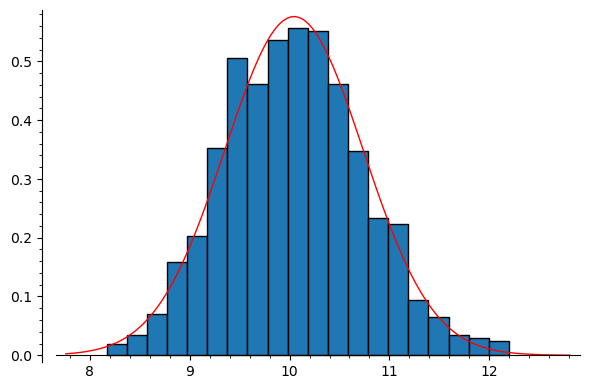

In [329]:
min_fact =  min(lMoyenneObs)*0.95 if min(lMoyenneObs) > 0 else  min(lMoyenneObs)*1.05
max_fact = max(lMoyenneObs)*1.05 if max(lMoyenneObs) > 0 else max(lMoyenneObs)*0.95

histogram(lMoyenneObs,bins=20,density=true)+plot(densite_normale(x, mu_TCL, sigma_TCL_nb), (min_fact, max_fact), color='red', linestyle='-')

## Test d'ajustement du Chi-Deux

### Obtention des effectifs observées et théoriques

1. On place les observations dans des classes pour former les effectifs

2. On estime le paramètre $\mu_{obs}$ par la moyenne empirique $\bar{X}$ (mean) et $\sigma_{obs}$ par la variance empirique non biaisée S' (variance)

3. On détermine la distribution normale théorique avec $\mu_{obs}$ et $\sigma_{obs}$

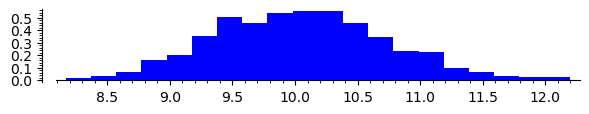

In [330]:
normObs = finance.TimeSeries(lMoyenneObs)

loiObs = normObs.histogram(20)
effObs = loiObs[0]
classes = loiObs[1]
nbrClasse = len(classes)

normObs.plot_histogram(bins=nbrClasse, normalize=True, aspect_ratio=1)

In [331]:
paramEstime = 0

moyObs = mean(normObs)
mu = moyObs
paramEstime += 1

print(f'La moyenne de l\'échantillon est {float(moyObs)} donc on choisit comme paramètre mu {float(mu)}')

varObs = variance(normObs)
sig = sqrt(varObs)
paramEstime += 1

print(f'La variance de l\'échantillon est {float(varObs)} donc on choisit comme paramètre sigma {float(sig)}')

distributionTheorique = DistTheoriqueNorm(loiObs, mu, sig)

effectifTheorique = DistributionaEffectifTheorique(distributionTheorique, tailleEchantillon)

La moyenne de l'échantillon est 10.04451980760843 donc on choisit comme paramètre mu 10.04451980760843
La variance de l'échantillon est 0.4796655536195711 donc on choisit comme paramètre sigma 0.6925789150844625


L'objectif est de tester l'hypothèse

$H_{0}$ La loi observée suit une loi normale de paramètre $\mu = 9.972$ et $\sigma  = 0.724$

contre

$H_{1}$ La loi observée ne suit pas une loi normale de paramètre $\mu = 9.972$ et $\sigma  = 0.724$

In [332]:
Entetes = ['Modalités'] + [f'[{ "%.2f" % classe[0]};{"%.2f" % classe[-1]}[' for classe in loiObs[1]]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,[8.17;8.37[,[8.37;8.57[,[8.57;8.77[,[8.77;8.97[,[8.97;9.17[,[9.17;9.38[,[9.38;9.58[,[9.58;9.78[,[9.78;9.98[,[9.98;10.18[,[10.18;10.38[,[10.38;10.59[,[10.59;10.79[,[10.79;10.99[,[10.99;11.19[,[11.19;11.39[,[11.39;11.59[,[11.59;11.79[,[11.79;12.00[,[12.00;12.20[
Effectifs observées,4,7,14,32,41,71,102,93,108,112,111,93,70,47,45,19,13,7,6,5
Effectifs théoriques,4.4158,8.8812,16.4226,27.9203,43.6421,62.7191,82.8714,100.6746,112.4465,115.4738,109.0266,94.6439,75.5377,55.4300,37.3970,23.1972,13.2295,6.9368,3.3441,2.4248


Il faut vérifier que les effectifs théoriques soient supérieurs à 5 comme préconisé dans le cours

In [333]:
classePauvre = []
for i in range(nbrClasse):
    effectif = effectifTheorique[i]
    if effectif < 5:
        classePauvre.append(classes[i])

if len(classePauvre) > 0:
    print(f'Attention il y a {len(classePauvre)} classe{"s" if len(classePauvre) > 1 else ""} avec moins de 5 observations :')
    print(', '.join(map(str, classePauvre)))

Attention il y a 3 classes avec moins de 5 observations :
(8.167682433476271, 8.36914207568341), (11.793955993204765, 11.995415635411904), (11.995415635411904, 12.196875277619043)


On regroupe les effectifs des 2 premières classes et des 2 dernières classes

In [335]:
loiObs = [loiObs[i] for i in range(len(loiObs))]

indexCoupe = -1

# Traitement des effectifs théoriques

effectifTheorique[indexCoupe-1] += sum(effectifTheorique[indexCoupe:])
effectifTheorique = effectifTheorique[:indexCoupe]

# Traitement des effectifs observés

loiObs[0][indexCoupe-1] += sum(loiObs[0][indexCoupe:])
loiObs[0] = loiObs[0][:indexCoupe]

# Traitement de la liste des modalités

loiObs[1] = loiObs[1][:indexCoupe]


indexCoupe = 0

# Traitement des effectifs théoriques

effectifTheorique[indexCoupe+1] += sum(effectifTheorique[:indexCoupe+1])
effectifTheorique = effectifTheorique[indexCoupe+1:]

# Traitement des effectifs observés

loiObs[0][indexCoupe+1] += sum(loiObs[0][:indexCoupe+1])
loiObs[0] = loiObs[0][indexCoupe+1:]

# Traitement de la liste des modalités

loiObs[1] = loiObs[1][indexCoupe+1:]

In [336]:
Entetes = ['Modalités'] + [f'[{ "%.2f" % classe[0]};{"%.2f" % classe[-1]}[' for classe in loiObs[1]]
Donnees = [['Effectifs observées'] + loiObs[0], ['Effectifs théoriques'] + effectifTheorique]

Tableau(Donnees, Entetes)

Modalités,[8.37;8.57[,[8.57;8.77[,[8.77;8.97[,[8.97;9.17[,[9.17;9.38[,[9.38;9.58[,[9.58;9.78[,[9.78;9.98[,[9.98;10.18[,[10.18;10.38[,[10.38;10.59[,[10.59;10.79[,[10.79;10.99[,[10.99;11.19[,[11.19;11.39[,[11.39;11.59[,[11.59;11.79[,[11.79;12.00[
Effectifs observées,11,14,32,41,71,102,93,108,112,111,93,70,47,45,19,13,7,11
Effectifs théoriques,13.2970,16.4226,27.9203,43.6421,62.7191,82.8714,100.6746,112.4465,115.4738,109.0266,94.6439,75.5377,55.4300,37.3970,23.1972,13.2295,6.9368,5.7689


In [337]:
distChi2 = DistanceChiDeux(loiObs[0], effectifTheorique)

print(f'Il y a {nbrClasse} classes')
print(f'Il a été estimé {paramEstime} paramètre{"s" if paramEstime > 1 else ""}')
print(f'Le degré de liberté est {nbrClasse-1-paramEstime}\n')

print(f'La valeur de la distance suite au test du khi 2 est : {float(distChi2)}')

Il y a 20 classes
Il a été estimé 2 paramètres
Le degré de liberté est 17

La valeur de la distance suite au test du khi 2 est : 16.689777747860067


Sur les tables de $\chi_{17}^{2}$, on peut voir que la distance est d'environ de 24,769 pour un risque de première espèce $\alpha=0.1$